In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.svm import LinearSVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
import pickle


In [4]:
df = pd.read_csv("/Users/mac/Downloads/archive (18)/medical speech transcription and intent/Medical Speech, Transcription, and Intent/overview-of-recordings.csv")

In [5]:
df.shape

(6661, 13)

In [6]:
df.describe()

,audio_clipping:confidence,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker:confidence,speaker_id,writer_id
count,6661.000000,6661.000000,6661.000000,6661.000000,6.661000e+03,6.661000e+03
mean,0.984625,0.854320,3.678268,0.984594,3.664962e+07,3.596655e+07
std,0.070909,0.165967,0.378536,0.069719,1.029919e+07,1.341818e+07
min,0.337800,0.336300,3.000000,0.342300,1.853182e+06,1.883056e+06
25%,1.000000,0.671100,3.330000,1.000000,3.482490e+07,3.498746e+07
50%,1.000000,1.000000,3.670000,1.000000,4.120334e+07,4.375503e+07
75%,1.000000,1.000000,4.000000,1.000000,4.385622e+07,4.411874e+07
max,1.000000,1.000000,5.000000,1.000000,4.444235e+07,4.434011e+07


In [7]:
df.sample(2, random_state=42)

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
5265,no_clipping,1.0,no_noise,1.0,4.0,audible_speaker,1.0,28006404,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_28006404_28326999.wav,I feel joint pain every time I move,Joint pain,43985758
3315,no_clipping,1.0,no_noise,1.0,3.0,audible_speaker,1.0,43883861,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43883861_53191362.wav,I have a cut that has become red and oozes puss.,Infected wound,42082009


In [8]:
df.isnull().sum()

audio_clipping                         0
audio_clipping:confidence              0
background_noise_audible               0
background_noise_audible:confidence    0
overall_quality_of_the_audio           0
quiet_speaker                          0
quiet_speaker:confidence               0
speaker_id                             0
file_download                          0
file_name                              0
phrase                                 0
prompt                                 0
writer_id                              0
dtype: int64

In [9]:
df.prompt.value_counts()

prompt
Acne                  328
Shoulder pain         320
Joint pain            318
Infected wound        306
Knee pain             305
Cough                 293
Feeling dizzy         283
Muscle pain           282
Heart hurts           273
Ear ache              270
Hair falling out      264
Head ache             263
Feeling cold          263
Skin issue            262
Stomach ache          261
Back pain             259
Neck pain             251
Internal pain         248
Blurry vision         246
Body feels weak       241
Hard to breath        233
Emotional pain        231
Injury from sports    230
Foot ache             223
Open wound            208
Name: count, dtype: int64

In [10]:
X = df["phrase"]
y = df["prompt"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("svc", LinearSVC()),])

pipe.fit(X_train, y_train)

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [12]:
preds = pipe.predict(X_test)

print(classification_report(y_test, preds))

                    precision    recall  f1-score   support

              Acne       1.00      1.00      1.00        66
         Back pain       1.00      1.00      1.00        52
     Blurry vision       1.00      1.00      1.00        49
   Body feels weak       1.00      0.98      0.99        48
             Cough       1.00      1.00      1.00        59
          Ear ache       1.00      1.00      1.00        54
    Emotional pain       1.00      1.00      1.00        46
      Feeling cold       1.00      1.00      1.00        53
     Feeling dizzy       1.00      1.00      1.00        57
         Foot ache       1.00      1.00      1.00        44
  Hair falling out       0.98      1.00      0.99        53
    Hard to breath       1.00      1.00      1.00        47
         Head ache       1.00      1.00      1.00        53
       Heart hurts       1.00      1.00      1.00        55
    Infected wound       1.00      1.00      1.00        61
Injury from sports       1.00      1.00

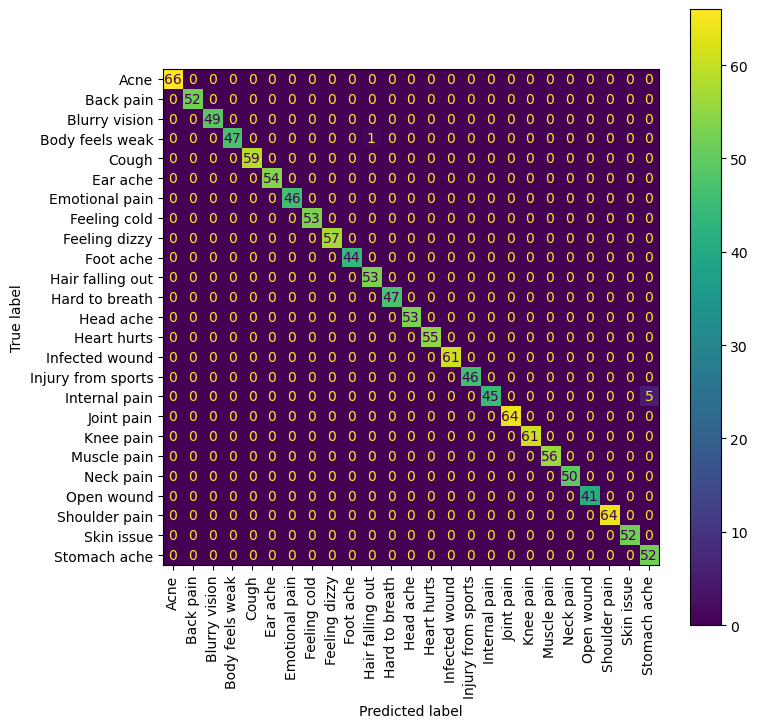

In [14]:
fig, ax = plt.subplots(figsize=(8,8))
cm_display = ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, ax=ax)
plt.xticks(rotation=90)
plt.show()

In [16]:
pipe.predict(['I feel joint pain every time I move'])

array(['Joint pain'], dtype=object)

In [17]:
final_pipe = Pipeline([("tfidf", TfidfVectorizer()), ("svc", LinearSVC()),])

final_pipe.fit(X, y)

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [18]:
data = np.array(['iwas playing vollyball and now my knee hurts so bad','i feel funny in my stomach'])
ser = pd.Series(data)
predz = final_pipe.predict(ser) 

In [19]:
predz

array(['Knee pain', 'Stomach ache'], dtype=object)

In [20]:
Pkl_Filename = "model.pkl"

with open(Pkl_Filename, "wb") as file:
    pickle.dump(final_pipe, file)

In [21]:
with open(Pkl_Filename, "rb") as file:
    my_model = pickle.load(file)
my_model

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [22]:
my_model.predict(ser)

array(['Knee pain', 'Stomach ache'], dtype=object)